# Introduction of Team Members

1st speaker: Zhang Heng (HZHANG086@e.ntu.edu.sg)

2nd speaker: Gui Yu Xin (GUIY0003@e.ntu.edu.sg)

3rd speaker: Bong Ru Yi (RBONG003@e.ntu.edu.sg)

4th speaker: Vandita Rangaranjan (VANDITA001@e.ntu.edu.sg)

5th speaker: Sarika (SARIKA001@e.ntu.edu.sg)

## TO RUN CODE
### There is a main code block for the project requirement and and additional requirement code block at the end (PLEASE RUN SEPARATELY)

---
# What we want to achieve
1. 10 groups of 5 in each tutorial group
2 No majority in gender
3. No majority in school
4. Equal distribution of CGPA

---
# Problem Decompostion

### Step 1
- We will split the cohort of 6000 students into 120 tutorial groups using a dictionary.
- Each tutorial group will then have 50 students.

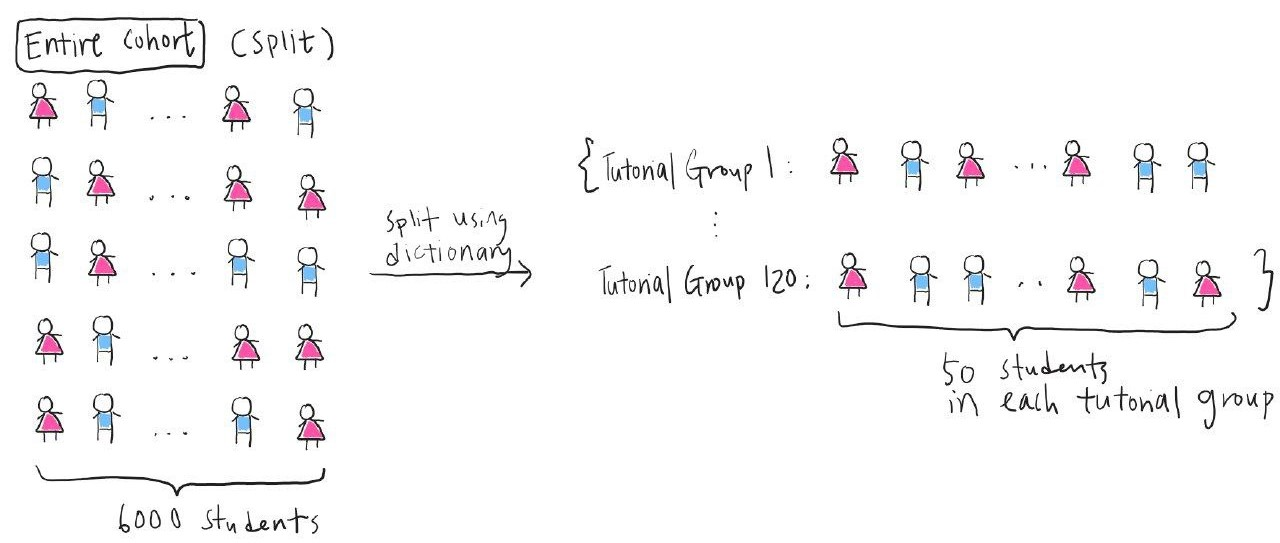

### Step 2
- Split each tutorial group into males and females using lists.

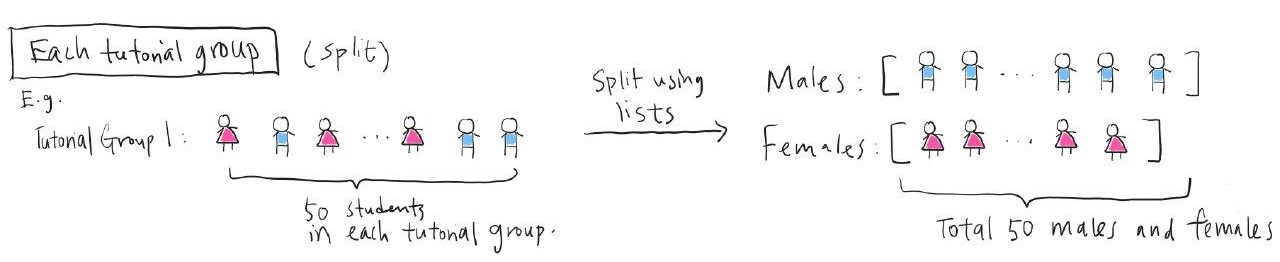

### Step 3
- We sort the males and females of each tutorial group in acsending order of CGPA.

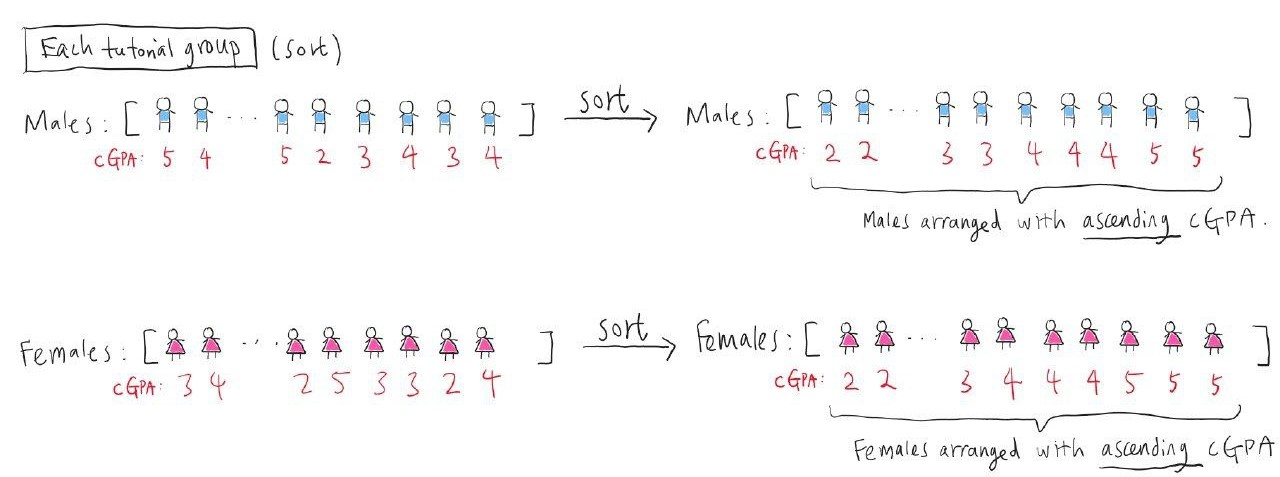

### Step 4(a)
- We start forming 10 small groups of 5 students within each tutorial group. 
- We start with the male lists and assign each male to a small group using loops. 
- In our first loop, we assign each male starting from Group 1 based on ascending cGPA, with the lowest cGPA in Group 1, the second lowest in Group 2, and so forth. 
- In our second loop, we assign each male starting from Group 1 based on descending cGPA, with the highest cGPA in Group 1, the second highest in Group 2, and so forth. 
- We repeat this process until all the males are assigned to a small group. 
- Once a male has been assigned a group, he is removed from the male list. 

Sort males:

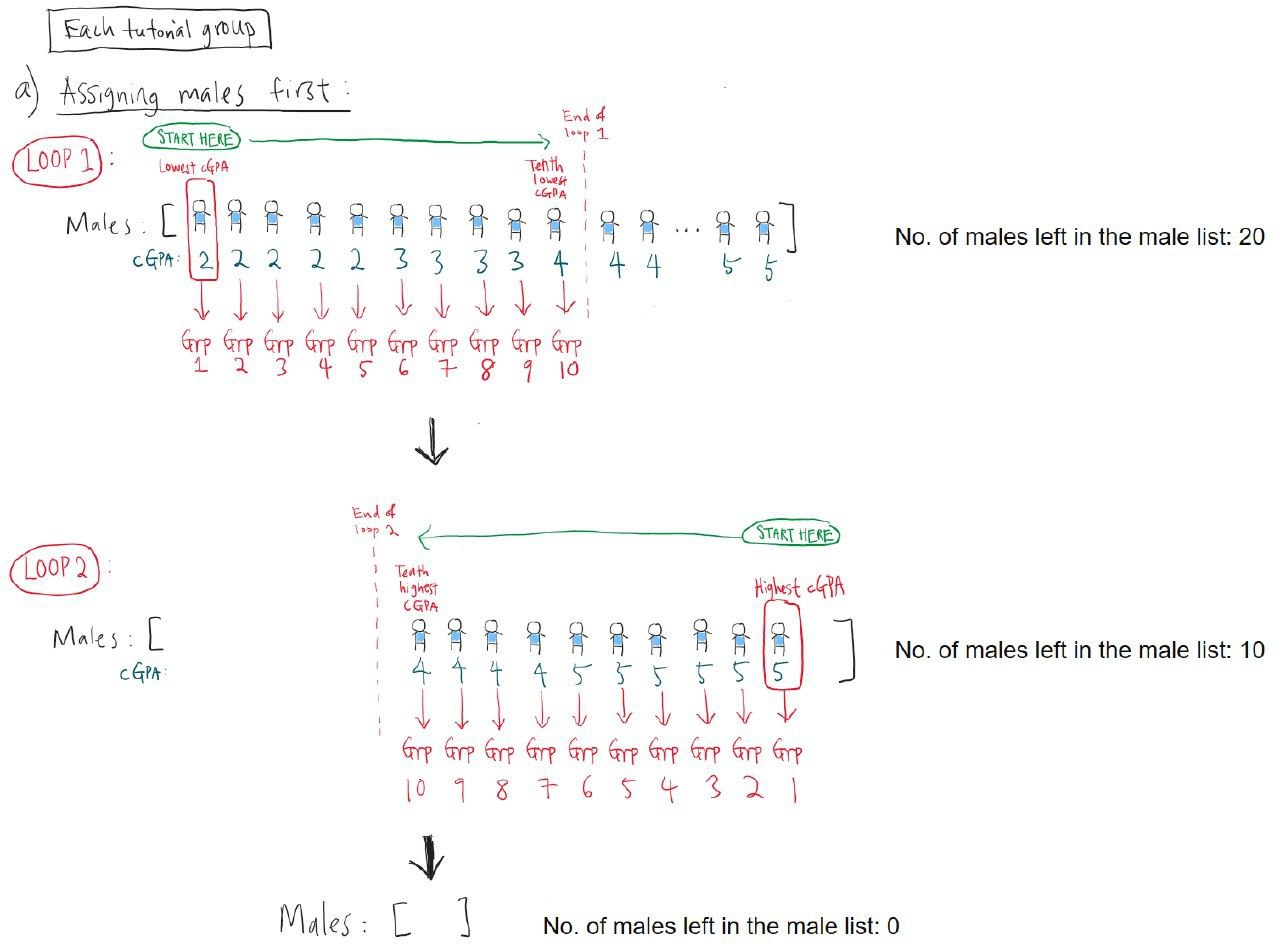

When we apply this to our example tutorial group, we will get the following small groups:

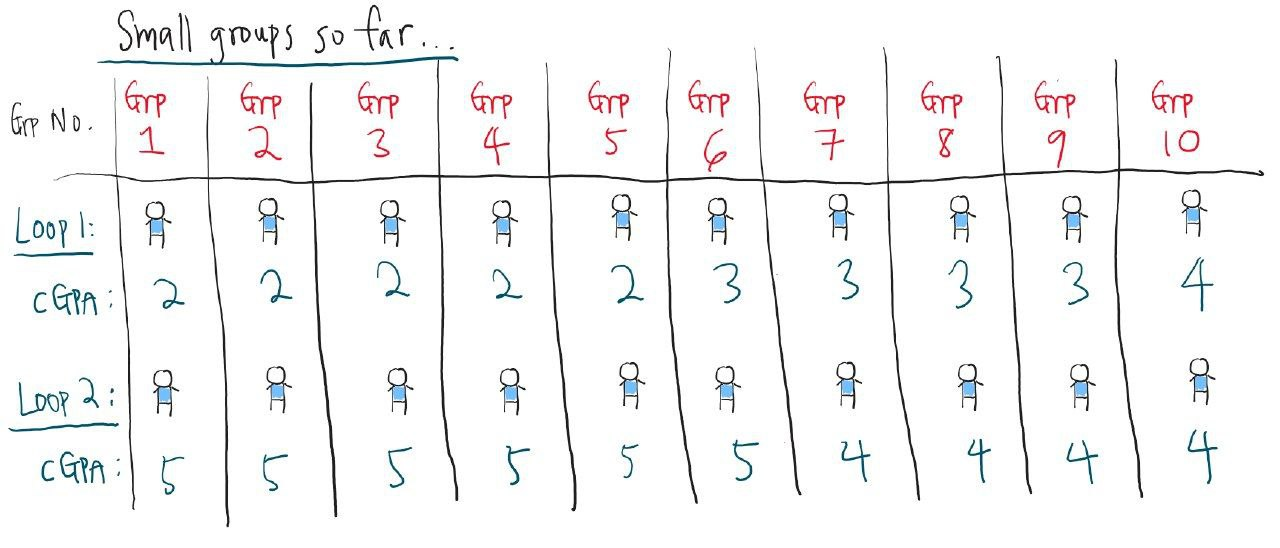

- Next, we use the female lists and assign each female to a small group using loops. 
- The process is the same, except that now we assign them to Groups starting from Group 10. 
- So, in our first loop, we assign each female based on ascending cGPA, with the lowest cGPA in Group 10, the second lowest in Group 9, and so forth. 
- In our second loop, we assign each female based on descending cGPA, with the highest cGPA in Group 10, the second highest in Group 9, and so forth. 
- Just like the males, we repeat this process until all the females are assigned to a small group. 
- Once a female has been assigned a group, she is removed from the female list.

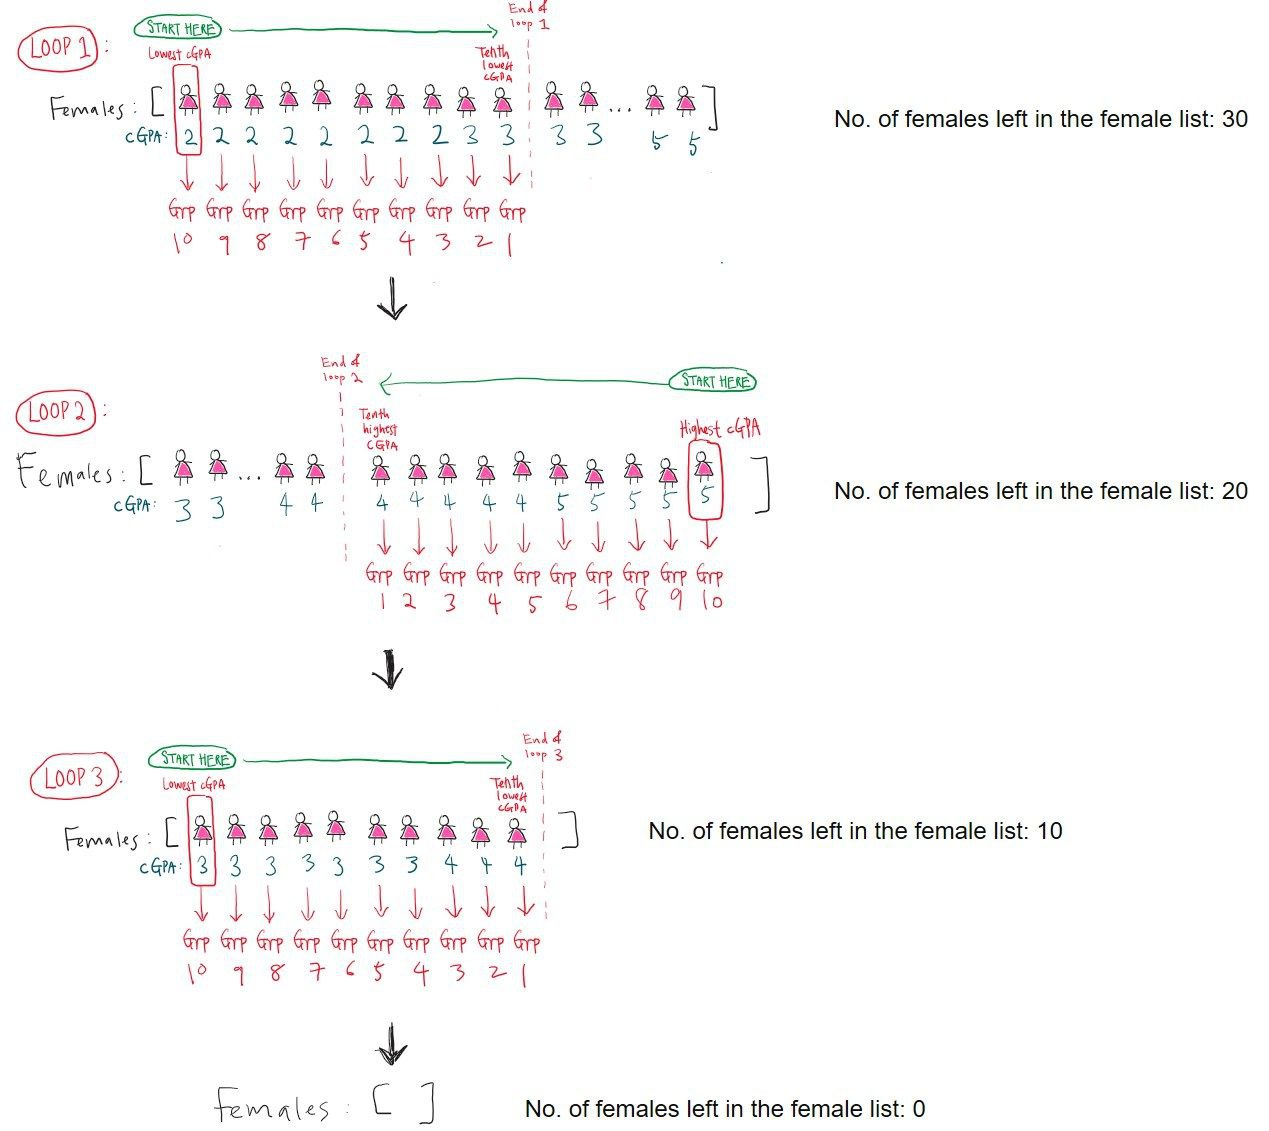

As we can see, the genders are evenly distributed in each group and have around the same average CGPA.

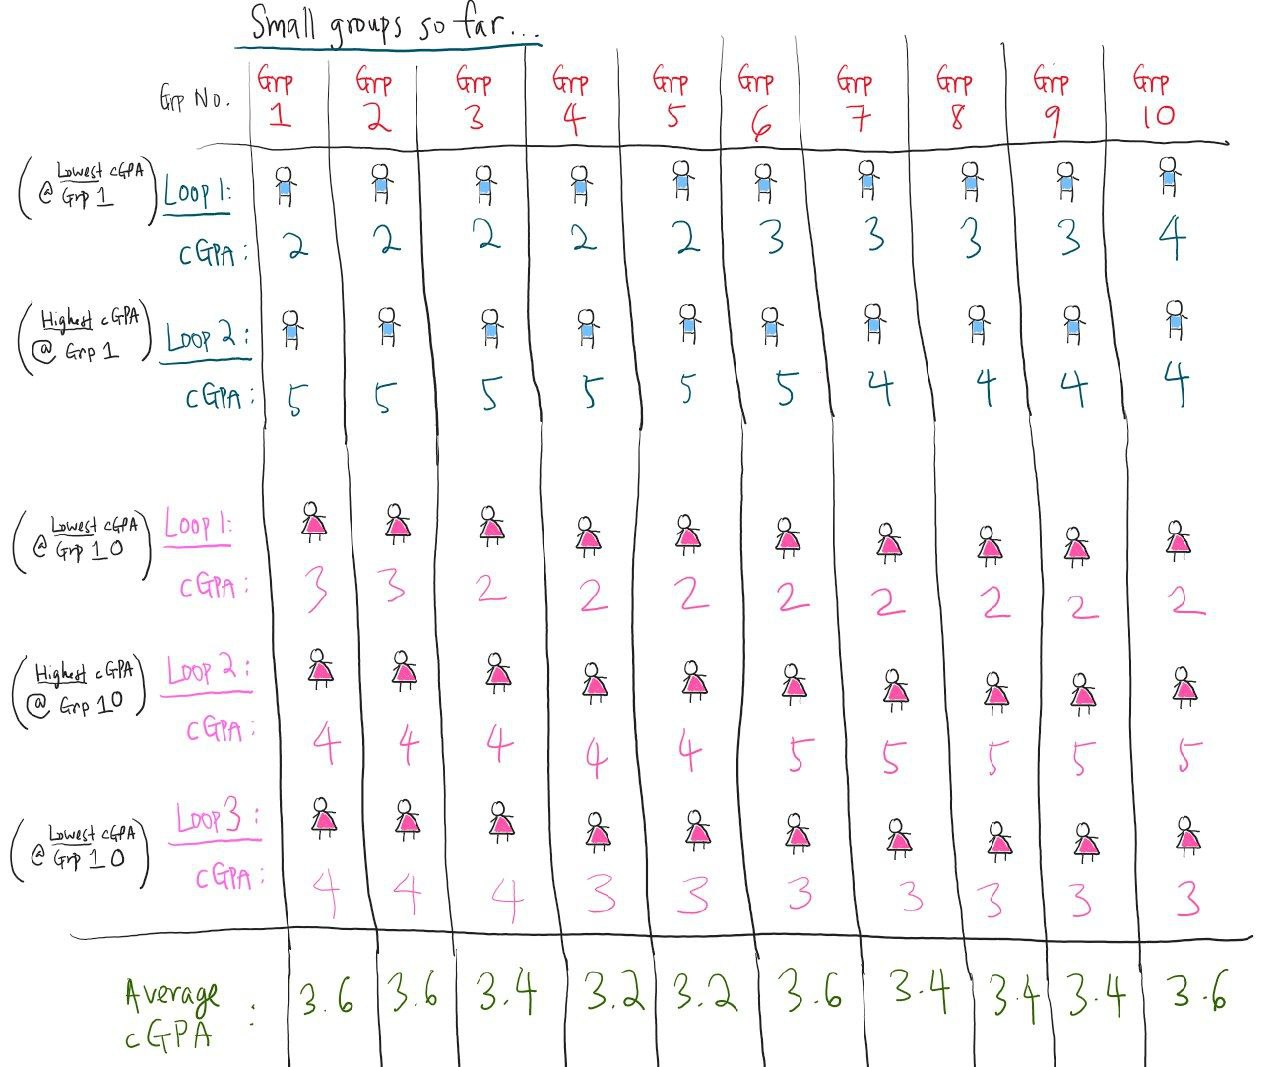

### Step 4(b)

To ensure that each small groups has students from different schools, we do the following.

During the loop: 
- If a student shares the same school as anyone else in the small group, the program skips them and assigns them to the next eligible group. 
- The replacement student from that group then takes their place in the target group, effectively swapping their positions

---
# Challenges

While we were coming up with the code, we faced several challenges.  
 
1. At the start, there was a long chunk of code that was hard to understand. 
2. The initial code had too many repetitions and redundant lines. 
3. The intitial code did not anticipate potential errors that could arise, so we used try and except blocks to handle any errors that may occur during code execution. 
 
These led to many rounds of code revision.

---
# Code Explanations

In [13]:
import csv
import os
import tkinter as tk
from tkinter import filedialog
import matplotlib.pyplot as plt

#### *Full explanations*

import csv
- select excel file we want to upload

import os: 
- manipulates file paths or checks if files exist. 

import tkinter as tk: 
- Creates and manipulates graphical user interface (GUI)
- Increases user interactivity, allows user to directly import files into IDE application without having to manually upload the file into the IDE application.

from tkinter import filedialog: 
- filedialog module provides functions for opening file dialog windows, allowing the user to open or save files and select directories.

import matplotlib.pyplot as plt: 
- imports pyplot module from matplot library, which allows us to create charts and graphs for analysis of data

In [14]:
def initialize_root_window():
   try:
       root = tk.Tk()
       root.withdraw()
       return root
   except Exception as e:
       print("Error initializing the Tkinter root window:", e)
       exit()

Define a function to create the tkinter root window

#### *Full explanations*

def initialize_root_window(): 
- creates a tkinter root window, which is the main window of a GUI application.  

Enter try loop

root = tk.Tk()
- Creates the main window, which is the foundation for all other elements to be built (like text boxes, labels etc)

root.withdraw()
- hides the root window so it is not visible
Since we are using tkinter for file dialogs, we do not want full application window to appear on the screen

return root
- Returns root object to any code that calls the initialize_root_window() function, making it accessible outside this function

#### *Flowchart*

initialize_root_window

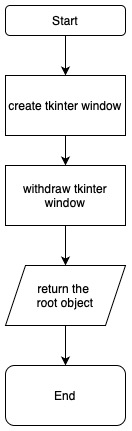

#### *Pseudocode*

```plaintext
INITIALIZE Tkinter root window
TRY
    CREATE a hidden Tkinter root window
    RETURN root window object
CATCH Exception
    PRINT "Error initializing the Tkinter root window"
    EXIT
END TRY


In [15]:
def get_file_path():
   try:
       file_path = filedialog.askopenfilename()
       if not file_path:
           raise FileNotFoundError("No file selected.")
       return file_path
   except Exception as e:
       print("Error opening the file dialog:", e)
       exit()

Define get_file_path function. Purpose of function is to select our records CSV file from user's computer.

#### *Full explanations*

def get_file_path(): 
- Opens a file dialog, allowing the user to browse and select a file, and return the file path. 
- filedialog: module in tkinter that provides functions for file-related dialog boxes, such as opening files, saving files, or selecting directories

Enter try block

file_path = filedialog.askopenfilename()
- Opens a file dialog using filedialog.askopenfilename() from tkinter library, allowing user to browse computer and select a file (records.csv in this case)
- After selecting a file, its file path is stored as a string in variable file_path

if not file_path:
- Checks if file_path is empty. Empty file_path means user did not select a file and likely closed the dialog without choosing one. 

raise FileNotFoundError("No file selected.")
- If file_path is empty, FileNotFoundError is raised with a custom error message, "No file selected.". 
- Stops the function and sends control to the except block

return file_path:
- If file was successfully selected, this line returns the file path to the code that called get_file_path()

except Exception as e: 
- Catches any exception that occurs in the try block, allowing the error type to be raised, including FileNotFoundError.

print("Error opening the file dialog:", e)
- prints an error message along with the specific exception message stored in e, helping the user understand what went wrong.

### *Flowchart*
get_file_path

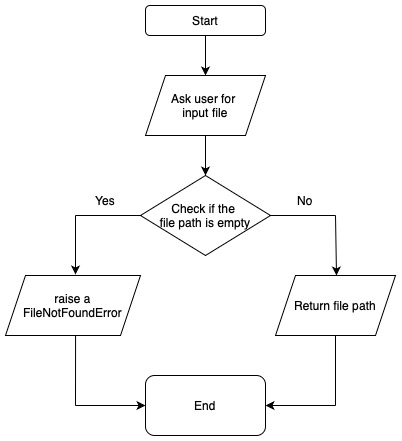

### *Pseudocode*

```plaintext
GET file path using file dialog
TRY
    OPEN file dialog to select a CSV file
    IF no file selected THEN
        RAISE FileNotFoundError
    END IF
    RETURN file path
CATCH Exception
    PRINT "Error opening the file dialog"
    EXIT
END TRY

In [16]:
def process_tutorial_groups(file_path):
   tutorials_dict = {}
   try:
       with open(file_path, 'r') as records:
           records_reader = csv.reader(records)
           headers = next(records_reader)

           for row in records_reader:
               tutorial_group = row[headers.index("Tutorial Group")]
               if tutorial_group not in tutorials_dict:
                   try:
                       tutorial_file = open(f'{tutorial_group}.csv', 'w', newline='')
                       tutorial_writer = csv.writer(tutorial_file)
                       tutorial_writer.writerow(headers)
                       tutorials_dict[tutorial_group] = (tutorial_writer, tutorial_file)
                   except Exception as e:
                       print(f"Error creating file for tutorial group '{tutorial_group}':", e)
                       continue
               try:
                   tutorials_dict[tutorial_group][0].writerow(row)
               except Exception as e:
                   print("Error writing row to tutorial group file:", e)
       return tutorials_dict
   except FileNotFoundError:
       print("File not found or path is incorrect.")
   except csv.Error as e:
       print("CSV reading error:", e)
   except Exception as e:
       print("An error occurred while processing the file:", e)
   finally:
       close_files(tutorials_dict)

1. Initialized tutorials_dict dictionary 
2. Opened the input csv file and read content inside 
3. First row containing column headers are extracted from CSV file in order to obtain index of Tutorial Group for each student
4. A tutorial file is created for every tutorial group, with all the student data written into each file
5. All 120 tutorial files will be stored into the dictionary we initialized



#### *Full explanations*

def process_tutorial_groups(file_path):
- function which reads the selected CSV file and organises students into respective tutorial groups
- also creates separate CSV files for each tutorial group and transfers student data into their respective files

tutorials_dict = {}
- initialise empty dictionary 
- keys are the tutorial group numbers, values are the data for the 50 students in each tutorial group

with open(file_path, ‘r’) as records: 
- Opens the file at file_path in read mode. with statement ensure the file closes after processing, regardless if there is an error.

records_reader = csv.reader(records)
- Creates a CSV reader object records_object to read the rows from records as lists of strings

headers = next(records_reader) 
- The next() function is called on records_reader to get this first row and assign it to the variable headers.
- The first call retrieves the first row of the CSV file. In this case, the headers such as Name, School, CGPA are obatined for first row.

for row in records_reader:
- iterates through each remaining row in the records_reader, excluding headers

tutorial_group = row[headers.index("Tutorial Group")] 
- headers.index("Tutorial Group") finds the index of “Tutorial Group” column in headers, 
- row[headers.index("Tutorial Group")] extracts the value associated with "Tutorial Group" from the current row. Eg. if “Tutorial Group” column contains value “G-90”, tutorial_group will be assigned this specific group number "G_90" for current row.
- tutorial_group represents tutorial group numbers (from G-1 to G-120) associated with the data in the current row

if tutorial_group not in tutorials_dict:
- Checks if the tutorial_group is already a key in the tutorials_dict dictionary.
- Since the tutorials_dict dictionary is initially empty, this if loop will ensure that all tutorial_group keys will be stored into the dictionary

Enter try block within if loop

tutorial_file = open(f'{tutorial_group}.csv', 'w', newline='')
- Creates a new CSV file (for writing) named after the tutorial_group.
- tutorial_group value is used to create a separate file for each tutorial group, where all rows belonging to that group will be saved in a new CSV file.
- newline='' prevents extra blank lines in the output file on Windows.
- mode ‘w’ stands for “write”. Means the tutorial file will be opened for writing
- There should be 120 tutorial files at the end.

tutorial_writer = csv.writer(tutorial_file): 
- initialises a CSV writer for tutorial_file to write rows of data to tutorial_file.

tutorial_writer.writerow(headers): 
- Writes the header row (assumed to contain the names of the columns) to this new group file (tutorial_file). 
- Ensures file has column headers

tutorials_dict[tutorial_group] = (tutorial_writer, tutorial_file): 
- adds an entry to tutorials_dict for the current tutorial_group, storing the tutorial_writer and the tutorial_file.
- tutorial_group is the key, tuple (tutorial_writer, tutorial_file) is the value (aka data for each tutorial_group)

Up till here, we have created 120 separate CSV files named after each tutorial group and all are entered into dictionary tutorials_dict.

except Exception as e: Catches any file creation errors.

print(f"Error creating file for tutorial group '{tutorial_group}':", e): 
Prints an error message if file creation has an error, and shows which group caused the issue.

continue: Skips to the next row in the main CSV file if an error occurs, without terminating the program.

Enter another another try-except block to handle row-writing errors.

tutorials_dict[tutorial_group][0].writerow(row): 
- For each tutorial_file, we basically write all rows of data of 50 students belonging to the same tutorial group into a single tutorial_file CSV file, and this loops 120 times until all tutorial_files are updated with the student data.

except Exception as e
- Catches any row-writing errors.
print("Error writing row to tutorial group file:", e)
- Prints an error message if writing fails.

return tutorials_dict
- Returns the dictionary which contains tutorial writers and tutorial files for every tutorial group.

Error handling for file reading:
- Catches missing files, CSV errors, and general errors. Then print out the errors.

finally: close_files(tutorials_dict) 
- Calls close_files to close all open files
- Always executed whether or not exception occurred

### *Flowchart*
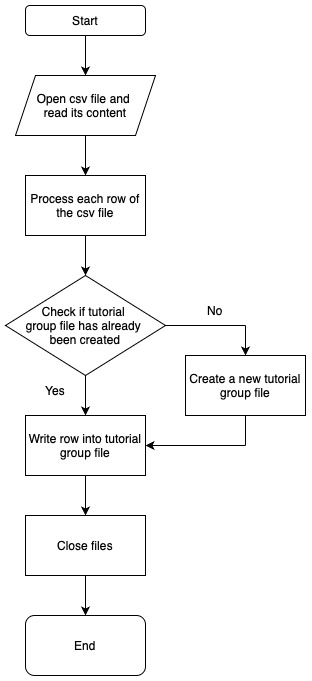

### *Pseudocode*

```Plaintext
PROCESS tutorial groups from CSV file
INITIALIZE empty dictionary tutorials_dict
TRY
    OPEN the CSV file at file path in read mode
    INITIALIZE CSV reader and read headers
    FOR EACH row in the CSV reader DO
        READ "Tutorial Group" from row
        IF tutorial group not in tutorials_dict THEN
            TRY
                OPEN a new CSV file for the tutorial group
                INITIALIZE CSV writer for this file
                WRITE headers to the new file
                ADD writer and file to tutorials_dict
            CATCH Exception
                PRINT "Error creating file for tutorial group"
                CONTINUE to next row
            END TRY
        END IF
        TRY
            WRITE row to the CSV file for the tutorial group
        CATCH Exception
            PRINT "Error writing row to tutorial group file"
    END FOR
FINALLY
    CALL close_files with tutorials_dict
CATCH FileNotFoundError
    PRINT "File not found or path is incorrect"
CATCH CSV error
    PRINT "CSV reading error"
CATCH Exception
    PRINT "An error occurred while processing the file"
END TRY

In [17]:
def close_files(tutorials_dict):
   for writer, tutorial_file in tutorials_dict.values():
       tutorial_file.close()

Define close_files, to close all 120 tutorial files after writing of student data into each file is completed.

### *Full Explanations*

def close_files(tutorials_dict): 
- Defines a function to close all open files.

for writer, tutorial_file in tutorials_dict.values():
- Starts a for loop to iterate over each value in tutorials_dict
- .values() retrieves only the values from the dictionary, which are tuples of (writer, tutorial_file) for each tutorial group.

tutorial_file.close()
- Closes the tutorial_file object after writing is completed.

### *Flowchart*

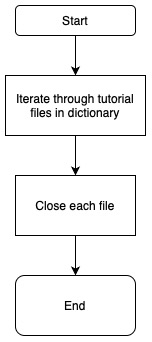

### *Pseudocode*

```plaintext
DEFINE FUNCTION close_files with tutorials_dict
    FOR EACH writer and file in tutorials_dict DO
        CLOSE the file
    END FOR
END FUNCTION

In [18]:
def get_csv_files():
   try:
       directory = os.getcwd()
       all_files = os.listdir(directory)
       return [file for file in all_files if file.startswith('G-')]

   except Exception as e:
       print("Error accessing the current directory or listing files:", e)
       exit()

Define get_csv_files function to obtain all the 120 tutorial files we have created.

#### *Full explanations*

def get_csv_files(): 
- Defines a function to return a list of CSV files starting with "G-"  (all tutorial_file files)

Enter try except block

return [file for file in all_files if file.startswith('G-')]: 
- Uses list comprehension to create a list of files that start with “G-“
- for files in all_files will analyze files in all_files 
- file.startswith('G-') will check if file name begins with “G-“
Only files which meet this condition are included in the returned list

except Exception as e
- Catches any errors.

print("Error accessing the current directory or listing files:", e)
- Prints an error message with the specific error if listing fails.

exit()
- Terminates the code, preventing further errors.

Summary: Basically what we do here is to select specific files (all tutorial_file files) in the current directory and return them in a list to process further.

### *Flowchart*

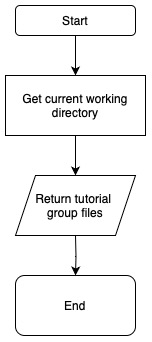

### *Pseudocode*

```plaintext
GET all CSV files in current directory
TRY
    SET directory to current working directory
    GET all files in directory
    RETURN list of files starting with 'G-'
CATCH Exception
    PRINT "Error accessing the current directory or listing files"
    EXIT
END TRY

In [19]:
def find_next_student(headers, groups_dict, students, group, loop_count):
   j = 0 if loop_count % 2 == 0 else -1
   step = 1 if loop_count % 2 == 0 else -1
   while any(student[headers.index("School")] == students[j % len(students)][headers.index("School")]
             for student in groups_dict[group]) and abs(j) < len(students):
       j += step
   return j % len(students)

- The code uses two variables for traversing the students list: j and step. j is the index that moves through the list, and step controls the direction in which j moves.
- If loop_count is even: step is 1, so j traverses forward through the list.
- If loop_count is odd: step is -1, so j traverses in reverse.
- Reason for bidirectional traversal is to ensure that the mean CGPA of the group is balanced as the list is sorted in ascending order of CGPA. So traversing it in only one direction, causes the CGPA to be too low for some groups and too high for others.

While loop functioning:

- headers.index("School"): Accesses the "School" column to retrieve each student’s school name and checks if it matches the school of any students in the group.
- Incrementing j: After each iteration, j is incremented by step to check the next student in the specified direction

While loop continues until:
- A student from a unique school is found, or
- j reaches beyond the bounds of the students list.


#### *Full Explanations*

j = 0 if loop_count % 2 == 0 else -1
step = 1 if loop_count % 2 == 0 else -1

FOR MALES
- j is the starting position of the list of students and step determines direction which students are appended (forwards or backwards from males list)
- j and step control where we start looking in the students list and in which direction
- If loop_count is even (0, 2, 4…, but actually it just means 1st run, 3rd run, 5th run…), j = 0, so we start from the beginning of the males list, and step is 1, meaning we’ll go forward in the list. This means males will be appended in ascending order of CGPA from group 1 to 10
- If loop_count is odd (1, 3, 5…, but actually it just means 2nd run, 4th run, 6th run…), j = -1, so we start from the end of the males list, and step = -1, meaning we’ll go backwards in the list. This means males will be appended in descending order of CGPA from group 1 to 10

FOR FEMALES
- If loop_count is even (0, 2, 4…, but actually it just means 1st run, 3rd run, 5th run…), j = 0, so we start from the beginning of the females list, and step is 1, meaning we’ll go forward in the list. This means females will be appended in ascending order of CGPA from group 10 to 1
- If loop_count is odd (1, 3, 5…, but actually it just means 2nd run, 4th run, 6th run…), j = -1, so we start from the end of the females list, and step = -1, meaning we’ll go backwards in the list. This means females will be appended in descending order of CGPA from group 10 to 1

This ensures that the function alternates the search direction for every loop increment, allowing even spread of students' CGPAs, since students will be chosen from both ends of the males and females lists.

while any(student[headers.index("School")] == students[j % len(students)][headers.index("School")]
     for student in groups_dict[group]) and abs(j) < len(students):
- while loop checks if the next student to be assigned is from a school that already has students in the current group:
- students[j % len(students)] refers to student at index j in the students list
- students[j % len(students)][headers.index("School")] obtains the school of the student at index j. 
- The any() function checks if any student in groups_dict[group] is from the same school as students[j % len(students)].
- If any matches are found, the loop continues, meaning the current student students[j] should not be assigned to avoid putting students from the same school together.

- len(students) returns the total number of students left in the students list.
- j % len(students) returns the the remainder of the division of j by len(students).
This means that:
If j is a non-negative integer less than len(students), j % len(students) returns j. In this case, j will always be less than len(students), since the maximum student index is always one less than remaining number of students in the list.

j += step
- If the current student at index j is from the same school as someone already in the group, j is updated by adding step, moving forward or backward in the list based on loop_count number. 

### *Flowchart*

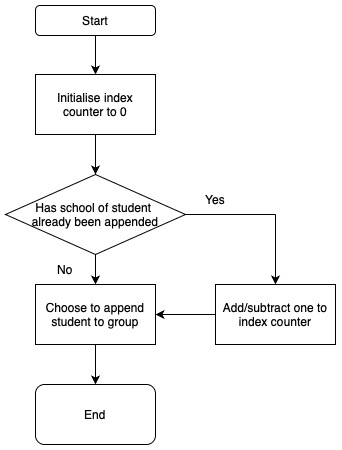

### *Pseudocode*

```plaintext
DEFINE FUNCTION find_next_student with headers, groups_dict, students, group, loop_count
    SET j to 0 IF loop_count is even ELSE -1
    SET step to 1 IF loop_count is even ELSE -1
    WHILE student with same "School" as any in group exists in students AND abs(j) < length of students DO
        INCREMENT j by step
    END WHILE
    RETURN j mod length of students
END FUNCTION

In [20]:
def distribute_to_groups(headers, groups_dict, students, reverse):
   loop_count = 0
   while students:
       group_range = range(10, 0, -1) if reverse else range(1, 11)
       for i in group_range:
           if not students:
               break
           try:
               index = find_next_student(headers, groups_dict, students, i, loop_count)
               student = students[index]
               student.append(f'Group {i}')
               groups_dict[i].append(student)
               students.pop(index)
           except Exception as e:
               print(f"Error assigning students to group {i}:", e)
       loop_count += 1

1. Define the distribute_to_groups function 
2. We created a nested list (students), by combining males and females lists
2. loop_count is initialized
3. if reverse --> equates to True, which means females will be sorted in ascending order of CGPA from Group 10 to 1. Backwards direction since group range is range(10, 0, -1)
4. else --> equates to False, which means males will be sorted in ascending order of CGPA from Group 1 to 10. Forwards direction since group range is range (1, 11)
5. Everytime a student is added to groups, he or she will be removed from the list of students
6. After each iteration (after 10 students successfully grouped into 10 groups), then loop_count increases by 1

#### *Full Explanations*

def distribute_to_groups(headers, groups_dict, students, reverse):
- We have created a nested list (students), by combining males list and females list
- reverse=True is a Boolean expression which will make the function assign students to groups in reverse order (from Group 10 down to Group 1). When False, we start from Group 1 up to Group 10.

loop_count = 0 
- loop_count is initialized to 0. 

while students:
- runs twice: males list runs first, then females list 
- will exit only when all males and females have been appended to the groups, such that students list is empty.

group_range = range(1, 11) if not reverse else range(10, 0, -1)
- defines the group_range, which is the range of groups to which students will be assigned: 
- When "not reverse", males in males list will be sorted into the 10 groups. range(1, 11) means males will be assigned from groups 1 to 10, from lowest to highest CGPA. 
- When "reverse", females in females list will be sorted into the 10 groups. range(10, 0, -1) means females are assigned backwards from group 10 down to 1, from lowest to highest CGPA. This means group 1 has highest CGPA, group 10 has lowest CGPA. 

for i in group_range:
- This for loop iterates over each group number (i) in group_range. The function tries to assign a student to each of the 10 groups until students list is empty.

if not students:
    break
- If students is empty, the loop breaks, as it means all students have been assigned to the 10 groups.

try:
    index = find_next_student(headers, groups_dict, students, i, loop_count)
- calls the function find_next_student to find the index of the next student that should be added to current group (i).
- The find_next_student function takes the headers, groups_dict, students, i (the current group number), and loop_count (the current iteration of distribution).
- index stores the index of the student to be assigned to the current group.

student = students[index]
- retrieves student data at the index found by find_next_student.

student.append(f'Group {i}')
- appends the group number (e.g., "Group 1") to the student list, adding a label that identifies the group the student is in.

groups_dict[i].append(student)
- adds the student (now with the appended group label) to the list for the group i in groups_dict 

students.pop(index)
- removes the student from the students list, ensuring that the student is not assigned to multiple groups.

except Exception as e:
    print(f"Error assigning students to group {i}:", e)
- If an error occurs during the assignment process, this except block catches the exception.
- The error message is printed to show what went wrong when student was assigned to group i.

loop_count += 1
- After each iteration, loop_count is increases by 1.

### *Flowchart*

![distribute_to_groups flowchart.jpg](<attachment:distribute_to_groups flowchart.jpg>)

### *Pseudocode*

```plaintext
DEFINE FUNCTION distribute_to_groups with students, headers, groups_dict, reverse
    INITIALIZE loop_count to 0
    WHILE students list is not empty DO
        SET group_range to range from 10 to 1 IF reverse is True ELSE range from 1 to 10
        FOR EACH i in group_range DO
            IF students list is empty THEN BREAK
            TRY
                CALL find_next_student with headers, groups_dict, students, i, loop_count
                ASSIGN student to returned student from students list
                APPEND student to groups_dict[i]
                REMOVE student from students list
            CATCH Exception
                PRINT "Error assigning student to group"
        END FOR
        INCREMENT loop_count by 1
    END WHILE
END FUNCTION
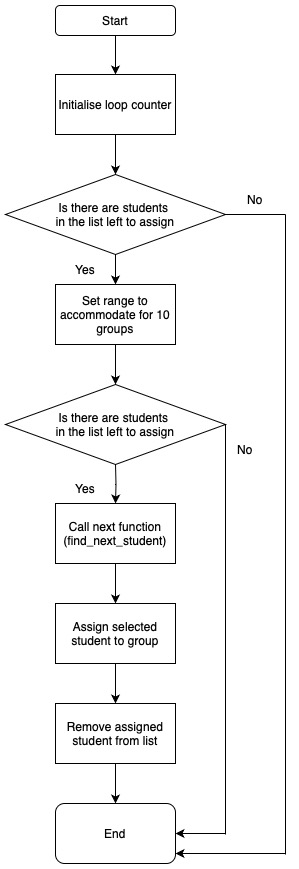

In [21]:
def distribute_students_by_gender(headers, tutorial_reader):
   groups_dict = {i: [] for i in range(1, 11)}
   males, females = [], []
   gender_index = headers.index("Gender")
   
   # Segregate students by gender
   for row in tutorial_reader:
       if row[gender_index] == 'Male':
           males.append(row)
       elif row[gender_index] == 'Female':
           females.append(row)

   # Sort by CGPA
   males.sort(key=lambda x: float(x[headers.index("CGPA")]))
   females.sort(key=lambda x: float(x[headers.index("CGPA")]))


   # Distribute students into groups
   distribute_to_groups(headers, groups_dict, males, reverse=False)
   distribute_to_groups(headers, groups_dict, females, reverse=True)


   return groups_dict

1. Define distribitute_students_by_gender 
2. Initialize second dictionary, groups_dict, which has keys from 1 to 10 and the values are currenty empty lists which students will be added to subsequently. In the end, each key (groups 1 to 10) will have its associated value (list of 5 students assigned to each group)
3. Initialize 2 separate male and female lists, to split students by gender.
4. Further sort the students in male and female list in ascending order of CGPA
5. reverse=False Boolean expression for males ensures that males will be added from groups 1 to 10
6. reverse=True Boolean expression for females ensures that females will be added from groups 10 to 1

#### *Full Explanations*

def distribute_students_by_gender(headers, tutorial_reader):
- headers is expected to be a list containing the names of the columns
- tutorial_reader is the CSV reader object that allows access to each row of student data.

groups_dict = {i: [] for i in range(1, 11)}
- initialises a dictionary, groups_dict. 
- {i: [] for i in range(1, 11)} makes use of dictionary comprehension to create a dictionary with group numbers (1 to 10) as keys and empty lists as values, where students will be added subsequently.

Now, we have 2 dictionaries introduced 
1. tutorials_dict is the dictionary containing all 120 tutorial groups, each 50 students
2. groups_dict is the dictionary containing all 10 groups within each tutorial group. Each group should contin 5 students. groups_dict is a dictionary within another dictionary.

males, females = [], []
- Two empty lists, males and females, are initialised in each tutorial group to store students based on their gender.

gender_index = headers.index("Gender")
- This line finds the index of the "Gender" in headers.
- gender_index will locate the "Gender" value for every student.

for row in tutorial_reader: 
- for loop iterates through each row in tutorial_reader, allowing one student’s data in a particular tutorial group to be processed at a time
- Keeps looping till all students are sorted into the 2 lists based on gender
- Recall that tutorial_reader reads data in tutorial_file

if row[gender_index] == 'Male': 
males.append(row)
- row[gender_index] accesses “Gender” value in current row
- If value is “Male”, row containing student information is appended to the males list

elif row[gender_index] == 'Female': 
females.append(row) 
- row[gender_index] accesses “Gender” value in current row
- If value is “Female”, row containing student information is appended to the females list

We sort all males and females into respective lists for each tutorial group

males.sort(key=lambda x: float(x[headers.index("CGPA")])):  
- index(”CGPA”) is to locate “CGPA” column in each row
- use lambda function to convert each student’s CGPA to a float for sorting
- float() converts CGPA value from a string to a float 
- sort the lists of male students by their CGPA in ascending order

females.sort(key=lambda x: float(x[headers.index("CGPA")])): 
- same logic as for males, sort female students by their CGPA in ascending order

We update the male and female lists by rearranging them from lowest to highest CGPA

distribute_to_groups(headers, groups_dict, males, reverse=False)
- distribute_to_groups will add male students into group 1 to 10 in groups_dict in ascending order of their CGPA scores.

distribute_to_groups(headers, groups_dict, females, reverse=True)
- female students are added into groups 10 to 1 (reverse=True) in groups_dict in asccending order of CGPA

return groups_dict
- After sorting and distributing students into groups, this line returns groups_dict.
- groups_dict now contains the distribution of students across the 10 groups, with males and females organised as specified.

Summary: 
1. Initialise empty dictionary groups_dict, which contains 10 groups as keys and the values will be the final 5 students after sorting
2. Create males and females lists
3. Find index for Gender of students
4. Append males to males list and females to females list
5. Update male and female lists by rearranging students from lowest to highest CGPA
6. Males will be added from Group 1 to 10 in ascending order of CGPA, females will be added from groups 10 to 1 in ascending order of CGPA

### *Flowchart*

![distribute_students_by_gender flowchart.jpg](<attachment:distribute_students_by_gender flowchart.jpg>)

### *Pseudocode*

```plaintext
DEFINE FUNCTION distribute_students_by_gender with headers and CSV reader
    INITIALIZE dictionary groups_dict with 10 empty lists
    INITIALIZE lists males and females
    FIND index of "Gender" in headers

    FOR EACH row in CSV reader DO
        IF gender is "Male" THEN
            ADD row to males list
        ELSE IF gender is "Female" THEN
            ADD row to females list
    END FOR

    SORT males and females lists by "CGPA" in ascending order
    CALL _distribute_to_groups with males, headers, groups_dict, reverse = False
    CALL _distribute_to_groups with females, headers, groups_dict, reverse = True
    RETURN groups_dict
END FUNCTION
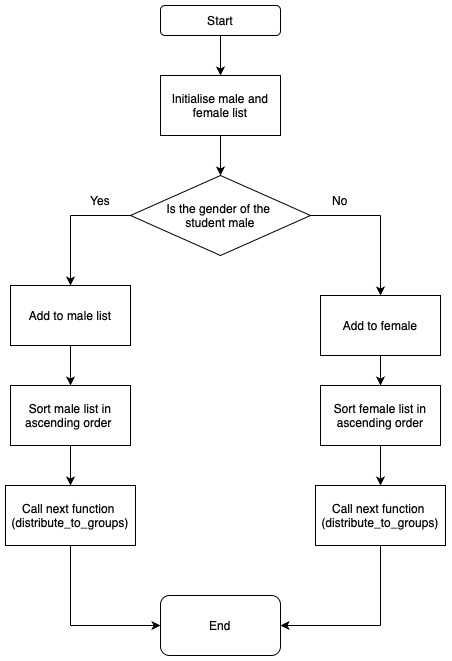

In [22]:
def assign_students_to_groups(filename):
   try:
       with open(filename, 'r') as tutorial_file:
           tutorial_reader = csv.reader(tutorial_file)
           headers = next(tutorial_reader)


           return distribute_students_by_gender(headers, tutorial_reader)
   except FileNotFoundError:
       print(f"File '{filename}' not found.")
   except csv.Error as e:
       print(f"CSV reading error in file '{filename}':", e)
   except Exception as e:
       print(f"An error occurred while processing '{filename}':", e)

1. Define assign_students_to_groups function, in order to sort students within each tutorial group into 10 small groups.
2. Call another function, distribute_students_by_gender.

#### *Full explanations*

def assign_students_to_groups(filename):
- filename refers to the CSV file which contains student data

Enter try-except block to handle file reading errors.

with open(filename, 'r') as tutorial_file: 
- Opens the file specified by filename in read mode, and assigns that file to tutorial_file.

tutorial_reader = csv.reader(tutorial_file): 
- creates a CSV reader object (tutorial_reader) for tutorial_file. 
- tutorial_reader enables reading of the file for every row.

headers = next(tutorial_reader): 
- next(tutorial_reader) reads the first line of the file, which contains the column headers, and stores them in headers.
- Stores header row separately so it would not get processed as a data row later

return distribute_students_by_gender(headers, tutorial_reader):
- calls another function distribute_students_by_gender 
- This function processes remaining rows (student data, excluding headers) to assign students to groups
- return keyword returns the result of distribute_students_by_gender to the caller of assign_students_to_groups

except FileNotFoundError:
- If specified file not found, error raised
print(f"File '{filename}' not found.")
- If a FileNotFoundError occurs, this line prints an error message.

except csv.Error as e:
- If there is an error reading CSV file, error raised
print(f"CSV reading error in file '{filename}':", e)
- If a csv.Error occurs, this line prints an error message specific to CSV reading errors.
The error message includes e, which contains details about the specific error that occurred.

except Exception as e:
- Catches any other errors not caught by previous except handling blocks
print(f"An error occurred while processing '{filename}':", e)
- This line prints a general error message for any other type of exception.
- The message includes e, providing specific details about the error.

### *Flowchart*

![assign_students_to_groups flowchart.jpg](<attachment:assign_students_to_groups flowchart.jpg>)

### *Pseudocode*

```plaintext
ASSIGN students to tutorial groups
FOR EACH filename in list of CSV files DO
    TRY
        OPEN filename in read mode
        INITIALIZE CSV reader and read headers
        CALL distribute_students_by_gender with headers and CSV reader
    CATCH FileNotFoundError
        PRINT "File not found"
    CATCH CSV error
        PRINT "CSV reading error in file"
    CATCH Exception
        PRINT "An error occurred while processing the file"
    END TRY
END FOR
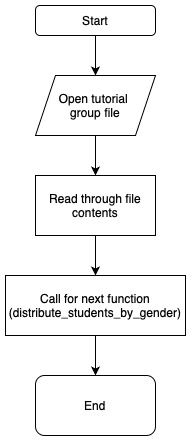

In [23]:
def update_headers(filename):
   try:
       with open(filename, 'r') as header_file:
           headers = next(header_file).strip().split(",")
           headers.append('Teams Assigned')
           return headers
   except Exception as e:
       print(f"Error reading headers from '{filename}':", e)

- creates a new column called teams assigned: that basically adds the group number of the student.
- it opens the file in a read mode, then splits the headers by commas, appends the team assigned to the header list.


#### *Full Explanations*

def update_headers(filename):
- read the headers (first row) from CSV file and add an additional header “Teams Assigned” and return the updated list of headers
- .strip() removes any leading and trailing whitespaces
- .split(“,”) splits line by commas, resulting in a list called headers

Eg. initially, first line in filename is 
Name,CGPA,School

New line will be:
‘Name’, ‘CGPA’, ‘School’, ‘Teams Assigned’

### *Flowchart*

![update_headers flowchart.jpg](<attachment:update_headers flowchart.jpg>)

### *Pseudocode*

```Plaintext
DEFINE function update_headers with parameter filename
TRY
    OPEN filename in read mode as header_file
    READ the first line of header_file and SPLIT it by commas
    STORE the resulting list in headers
    APPEND 'Teams Assigned' to headers
    RETURN headers
CATCH Exception as e
    PRINT "Error reading headers from", filename, e
END TRY

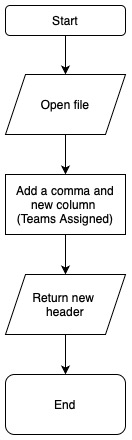

In [24]:
def write_combined_file(headers, tutorials_dict):
   try:
       with open('combined_tutorial_groups.csv', 'w', newline='') as csvfile:
           writer = csv.writer(csvfile)
           writer.writerow(headers)


           sorted_keys = sorted(
               tutorials_dict.keys(),
               key=lambda k: int(k.split('-')[1].split('.')[0])
           )


           for filename in sorted_keys:
               groups_dict = tutorials_dict[filename]
               for group, students in groups_dict.items():
                   for student in students:
                       writer.writerow(student)
                   writer.writerow([])  # Adds a blank line between groups
           return sorted_keys
   except Exception as e:
       print("Error writing the combined CSV file:", e)

- write_combined_file consolidates data from multiple tutorial group files into a single CSV file, allowing for organized presentation of groups and their students.

1. File Setup and Header Writing:
- The function opens (or creates) a file named combined_tutorial_groups.csv.
- It writes headers as the first row, representing the column names in the combined file.

2. Sorting and Accessing Tutorial Data:
- Filenames in tutorials_dict are sorted numerically, based on the number in each filename (e.g., "tutorial-1.csv", "tutorial-2.csv"). This sorted list, sorted_keys, ensures files are processed in the correct order.

3. Writing Group and Student Data:
- For each file in sorted_keys, the function retrieves the groups and their respective students.
- For each group, it writes rows of student data to the CSV file.
- A blank line is added between groups to visually separate them, improving readability.

4. Error Handling:
If an error occurs (eg. file access issue), error message is printed.


#### *Full Explanations*

def write_combined_file
- creates a consolidated CSV file, which is combined_tutorial_groups.csv which contains data from all 120 tutorial groups, separated by blank lines between groups.

writer = csv.writer(csvfile) 
writer.writerow(headers) 
- Writes the headers as the first rows in each of 120 tutorial files in combined_tutorial_groups.csv

sorted_keys = sorted(tutorials_dict.keys(), key=lambda k: int(k.split('-')[1].split('.')[0])) 
- sorts the keys of tutorials_dict based on an integer value from each key 'G-(number)', which is a string, and the code converts (number) to an integer for numerical sorting.

for filename in sorted_keys:
- Iterates over each key (tutorial group number) 
- filename represents one of the keys from tutorials_dict. In other words, filename is the tutorial group number

groups_dict = tutorials_dict[filename]:
- tutorials_dict[filename] accesses the value associated with the filename key in tutorials_dict
- groups_dict is the value, which is a dictionary containing groups 1 to 10 (keys) and students in those groups (values) 

for group, students in groups_dict.items() 
- iterates over each group in groups_dict
- group: Represents each group 1-10 within the tutorial group.
- students: list of 5 students in each group

for student in students: 
writer.writerow(student)
- each student’s data is written into their respective tutorial_file file.

writer.writerow([]) 
- adds an empty row after each group, to separate the 10 groups within each tutorial_file, which allows for better readability of the output.

### *Flowchart*

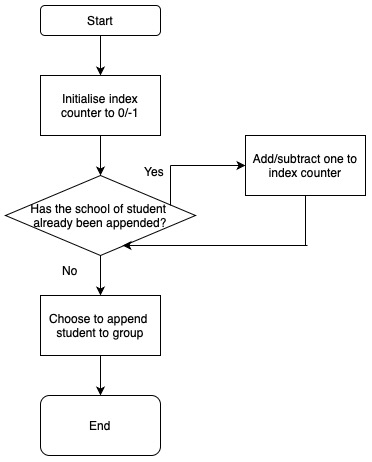

### *Pseudocode*

```plaintext
UPDATE headers with "Teams Assigned"
TRY
    OPEN 'combined_tutorial_groups.csv' in write mode
    CREATE a CSV writer
    WRITE headers to the file

    SORT the keys in tutorials_dict by extracting the number after '-' in each filename and converting it to an integer

    FOR each filename in sorted_keys
        RETRIEVE groups_dict from tutorials_dict using the filename as the key
        FOR each group and students in groups_dict
            FOR each student in students
                WRITE student to the file
            END FOR
            WRITE a blank line to separate groups
        END FOR
    END FOR
    RETURN sorted_keys
CATCH Exception as e
    PRINT "Error writing the combined CSV file:", e
END TRY
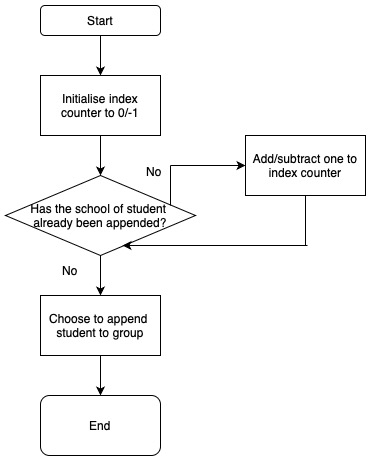

---
# Main code
Including Matplot

In [ ]:
import csv
import os
import tkinter as tk
from tkinter import filedialog
import matplotlib.pyplot as plt


def initialize_root_window():
    try:
        root = tk.Tk()
        root.withdraw()
        return root
    except Exception as e:
        print("Error initializing the Tkinter root window:", e)
        exit()


def get_file_path():
    try:
        file_path = filedialog.askopenfilename()
        if not file_path:
            raise FileNotFoundError("No file selected.")
        return file_path
    except Exception as e:
        print("Error opening the file dialog:", e)
        exit()


def process_tutorial_groups(file_path):
    tutorials_dict = {}
    try:
        with open(file_path, 'r') as records:
            records_reader = csv.reader(records)
            headers = next(records_reader)

            for row in records_reader:
                tutorial_group = row[headers.index("Tutorial Group")]
                if tutorial_group not in tutorials_dict:
                    try:
                        tutorial_file = open(f'{tutorial_group}.csv', 'w', newline='')
                        tutorial_writer = csv.writer(tutorial_file)
                        tutorial_writer.writerow(headers)
                        tutorials_dict[tutorial_group] = (tutorial_writer, tutorial_file)
                    except Exception as e:
                        print(f"Error creating file for tutorial group '{tutorial_group}':", e)
                        continue
                try:
                    tutorials_dict[tutorial_group][0].writerow(row)
                except Exception as e:
                    print("Error writing row to tutorial group file:", e)
        return tutorials_dict
    except FileNotFoundError:
        print("File not found or path is incorrect.")
    except csv.Error as e:
        print("CSV reading error:", e)
    except Exception as e:
        print("An error occurred while processing the file:", e)
    finally:
        close_files(tutorials_dict)


def close_files(tutorials_dict):
    for writer, tutorial_file in tutorials_dict.values():
        tutorial_file.close()


def get_csv_files():
    try:
        directory = os.getcwd()
        all_files = os.listdir(directory)
        return [file for file in all_files if file.startswith('G-')]

    except Exception as e:
        print("Error accessing the current directory or listing files:", e)
        exit()

def find_next_student(headers, groups_dict, students, group, loop_count):
    j = 0 if loop_count % 2 == 0 else -1
    step = 1 if loop_count % 2 == 0 else -1
    while any(student[headers.index("School")] == students[j % len(students)][headers.index("School")]
              for student in groups_dict[group]) and abs(j) < len(students):
        j += step
    return j % len(students)

def distribute_to_groups(headers, groups_dict, students, reverse):
    loop_count = 0
    while students:
        group_range = range(10, 0, -1) if reverse else range(1, 11)
        for i in group_range:
            if not students:
                break
            try:
                index = find_next_student(headers, groups_dict, students, i, loop_count)
                student = students[index]
                student.append(f'Group {i}')
                groups_dict[i].append(student)
                students.pop(index)
            except Exception as e:
                print(f"Error assigning students to group {i}:", e)
        loop_count += 1

def distribute_students_by_gender(headers, tutorial_reader):
    groups_dict = {i: [] for i in range(1, 11)}
    males, females = [], []
    gender_index = headers.index("Gender")

    # Segregate students by gender
    for row in tutorial_reader:
        if row[gender_index] == 'Male':
            males.append(row)
        elif row[gender_index] == 'Female':
            females.append(row)

    # Sort by CGPA
    males.sort(key=lambda x: float(x[headers.index("CGPA")]))
    females.sort(key=lambda x: float(x[headers.index("CGPA")]))

    # Distribute students into groups
    distribute_to_groups(headers, groups_dict, males, reverse=False)
    distribute_to_groups(headers, groups_dict, females, reverse=True)

    return groups_dict


def assign_students_to_groups(filename):
    try:
        with open(filename, 'r') as tutorial_file:
            tutorial_reader = csv.reader(tutorial_file)
            headers = next(tutorial_reader)

            return distribute_students_by_gender(headers, tutorial_reader)
    except FileNotFoundError:
        print(f"File '{filename}' not found.")
    except csv.Error as e:
        print(f"CSV reading error in file '{filename}':", e)
    except Exception as e:
        print(f"An error occurred while processing '{filename}':", e)


def write_combined_file(headers, tutorials_dict):
    try:
        with open('combined_tutorial_groups.csv', 'w', newline='') as csvfile:
            writer = csv.writer(csvfile)
            writer.writerow(headers)

            sorted_keys = sorted(
                tutorials_dict.keys(),
                key=lambda k: int(k.split('-')[1].split('.')[0])
            )

            for filename in sorted_keys:
                groups_dict = tutorials_dict[filename]
                for group, students in groups_dict.items():
                    for student in students:
                        writer.writerow(student)
                    writer.writerow([])  # Adds a blank line between groups
            return sorted_keys
    except Exception as e:
        print("Error writing the combined CSV file:", e)


def update_headers(filename):
    try:
        with open(filename, 'r') as header_file:
            headers = next(header_file).strip().split(",")
            headers.append('Teams Assigned')
            return headers
    except Exception as e:
        print(f"Error reading headers from '{filename}':", e)


def calculate_team_averages(headers, groups_dict):
    averages = {}
    for group, students in groups_dict.items():
        total_cgpa = sum(float(student[headers.index("CGPA")]) for student in students)
        average_cgpa = total_cgpa / len(students) if students else 0
        averages[group] = average_cgpa
    return averages


def calculate_male_female_ratio(headers, groups_dict):
    ratio_dict = {}
    for group, students in groups_dict.items():
        male_count = sum(1 for student in students if student[headers.index("Gender")] == 'Male')
        female_count = sum(1 for student in students if student[headers.index("Gender")] == 'Female')
        if female_count > 0:
            ratio = male_count / female_count
        else:
            ratio = float('inf')  # Handle case with no females
        ratio_dict[group] = ratio
    return ratio_dict


def calculate_standard_deviation(data):
    n = len(data)
    if n == 0:
        return 0
    mean = sum(data) / n
    variance = sum((x - mean) ** 2 for x in data) / n
    return variance ** 0.5


def plot_cgpa_spreads(headers, sorted_keys, tutorial_group_dict):
    tutorial_group_spreads = {}

    # Calculate the average CGPA for each group
    for filename in sorted_keys:
        groups_dict = tutorial_group_dict[filename]
        averages = calculate_team_averages(headers, groups_dict)
        tutorial_group_spreads[filename] = list(averages.values())

    all_std_devs = []
    group_numbers = []

    # Calculate standard deviations based on the sorted keys
    for filename in sorted_keys:
        spreads = tutorial_group_spreads[filename]
        if spreads:  # Ensure there are spreads to calculate std deviation
            std_dev = calculate_standard_deviation(spreads)
            all_std_devs.append(std_dev)


            # Extract group number from the filename (e.g., 'G-1.csv' to '1')
            group_number = int(filename.split('-')[1].split('.')[0])  # Convert to int for sorting
            group_numbers.append(group_number)
        else:
            print(f"No spreads found for {filename}. Skipping standard deviation calculation.")

    # Plotting the standard deviations
    if group_numbers and all_std_devs:
        plt.figure(figsize=(10, 5))
        plt.bar(group_numbers, all_std_devs, color='blue')
        plt.title('Standard Deviation of Average CGPA of Each Team Across Tutorial Groups')
        plt.xlabel('Tutorial Group Numbers')
        plt.ylabel('Standard Deviation of Average CGPA')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print("No data available for plotting.")


def plot_male_female_ratios(headers, sorted_keys, tutorial_group_dict):
    male_female_ratios = {}

    # Calculate the male to female ratios for each group
    for filename in sorted_keys:
        groups_dict = tutorial_group_dict[filename]
        ratios = calculate_male_female_ratio(headers, groups_dict)
        male_female_ratios[filename] = list(ratios.values())

    all_std_devs = []
    group_numbers = []

    # Extract group numbers and ratios based on the sorted keys
    for filename in sorted_keys:
        ratios = male_female_ratios[filename]
        if ratios:
            std_dev = calculate_standard_deviation(ratios)
            all_std_devs.append(std_dev)

            # Extract group number from the filename (e.g., 'G-1.csv' to '1')
            group_number = int(filename.split('-')[1].split('.')[0])  # Convert to int for sorting
            group_numbers.append(group_number)
        else:
            print(f"No ratios found for {filename}. Skipping standard deviation calculation.")

    # Plotting the male:female ratios
    if group_numbers and all_std_devs:
        plt.figure(figsize=(10, 5))
        plt.bar(group_numbers, all_std_devs, color='green')
        plt.title('Standard Deviation of Male to Female Ratios of Each Team Across Tutorial Groups')
        plt.xlabel('Tutorial Group Numbers')
        plt.ylabel('Standard Deviation of Male to Female Ratio')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print("No data available for plotting.")


def schools_dominated_teams(headers, tutorial_group_dict):
    dominated_teams = []

    for filename, groups_dict in tutorial_group_dict.items():
        for group_number, students in groups_dict.items():
            school_count = {}

            # Count occurrences of each school
            for student in students:
                school_name = student[headers.index("School")]
                if school_name in school_count:
                    school_count[school_name] += 1
                else:
                    school_count[school_name] = 1

            # Check for schools with more than 2 students
            for school, count in school_count.items():
                if count > 2:
                    dominated_teams.append((filename, group_number, school, count))

    if dominated_teams:
        print("Teams with more than 2 students from the same school:")
        for filename, group_number, school, count in dominated_teams:
            print(f"File: {filename}, Group: {group_number}, School: {school}, Count: {count}")
    else:
        print("No teams with more than 2 students from the same school found.")


def main():
    root = initialize_root_window()
    file_path = get_file_path()

    process_tutorial_groups(file_path)

    csv_files = get_csv_files()
    tutorials_dict = {}

    for filename in csv_files:
        groups_dict = assign_students_to_groups(filename)
        if groups_dict:
            tutorials_dict[filename] = groups_dict

    headers = None
    if csv_files:
        headers = update_headers(csv_files[0])

    sorted_keys = None
    if headers:
        sorted_keys = write_combined_file(headers, tutorials_dict)


    #EDA for CGPA and Male-Female Ratio
    plot_cgpa_spreads(headers, sorted_keys, tutorials_dict)
    plot_male_female_ratios(headers, sorted_keys, tutorials_dict)

    #Teams with dominating schools
    schools_dominated_teams(headers, tutorials_dict)


if __name__ == "__main__":
    main()

---
# Statistical Analysis of code
1. Equal distribution of CGPA:
Plot standard deviation of mean CGPA of each group within each tutorial group

2. Equal distibution of Gender:
Plot standard deviation of ratio of male to female of each group within each tutorial group

3. No majority in schools
Created a list check for groups with more than 2 students of the same school for further analysis

Since we cannot import math, we created functions to calculate the different data that we need to create the necessary plots.

In [26]:
def calculate_team_averages(headers, groups_dict):
    averages = {}
    for group, students in groups_dict.items():
        total_cgpa = sum(float(student[headers.index("CGPA")]) for student in students)
        average_cgpa = total_cgpa / len(students) if students else 0
        averages[group] = average_cgpa
    return averages

The calculate_team_averages function helps to find the average CGPA within each team by taking the sum of the individual CGPA of the members over the total number of students in a team.

In [27]:
def calculate_male_female_ratio(headers, groups_dict):
    ratio_dict = {}
    for group, students in groups_dict.items():
        male_count = sum(1 for student in students if student[headers.index("Gender")] == 'Male')
        female_count = sum(1 for student in students if student[headers.index("Gender")] == 'Female')
        if female_count > 0:
            ratio = male_count / female_count
        else:
            ratio = float('inf')  # Handle case with no females
        ratio_dict[group] = ratio
    return ratio_dict

The calculate_male_female_ratio function helps to calculate the ratio of the males to females in each team by taking numbers of males/number of females.

In [28]:
def calculate_standard_deviation(data):
    n = len(data)
    if n == 0:
        return 0
    mean = sum(data) / n
    variance = sum((x - mean) ** 2 for x in data) / n
    return variance ** 0.5

The calculate_standard_deviation function uses the formula (insert standard deviation formula image) to find the standard deviation for the above mentioned data.

In [29]:
def plot_cgpa_spreads(headers, sorted_keys, tutorial_group_dict):
    tutorial_group_spreads = {}

    # Calculate the average CGPA for each group
    for filename in sorted_keys:
        groups_dict = tutorial_group_dict[filename]
        averages = calculate_team_averages(headers, groups_dict)
        tutorial_group_spreads[filename] = list(averages.values())

    all_std_devs = []
    group_numbers = []

    # Calculate standard deviations based on the sorted keys
    for filename in sorted_keys:
        spreads = tutorial_group_spreads[filename]
        if spreads:  # Ensure there are spreads to calculate std deviation
            std_dev = calculate_standard_deviation(spreads)
            all_std_devs.append(std_dev)

            # Extract group number from the filename (e.g., 'G-1.csv' to '1')
            group_number = int(filename.split('-')[1].split('.')[0])  # Convert to int for sorting
            group_numbers.append(group_number)
        else:
            print(f"No spreads found for {filename}. Skipping standard deviation calculation.")

    # Plotting the standard deviations
    if group_numbers and all_std_devs:
        plt.figure(figsize=(10, 5))
        plt.bar(group_numbers, all_std_devs, color='blue')
        plt.title('Standard Deviation of Average CGPA of Each Team Across Tutorial Groups')
        plt.xlabel('Tutorial Group Numbers')
        plt.ylabel('Standard Deviation of Average CGPA')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print("No data available for plotting.")

The plot_cgpa_spread function helps to plot the data and returns the bar chart

![CGPA plot.jpeg](<attachment:CGPA plot.jpeg>)

We noticed one anomaly in the bar chart for tutorial group 3 and we dug deeper to find whether this was acceptable. Since the standard deviation was only a small percent (1.38%) of the total mean of the tutorial group 3, we decided the value was still acceptable and all the other groups with standard deviation lesser than group 3 is also accepted.
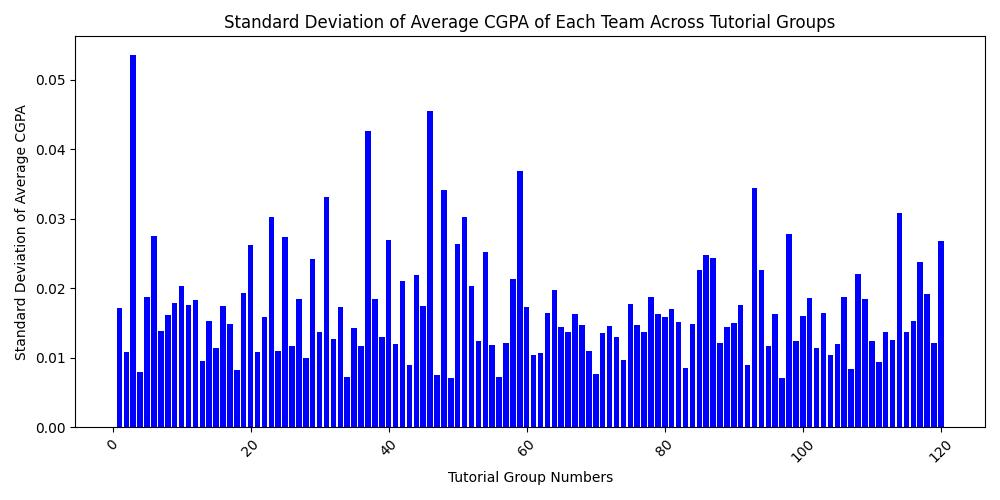

In [30]:
def plot_male_female_ratios(headers, sorted_keys, tutorial_group_dict):
    male_female_ratios = {}

    # Calculate the male to female ratios for each group
    for filename in sorted_keys:
        groups_dict = tutorial_group_dict[filename]
        ratios = calculate_male_female_ratio(headers, groups_dict)
        male_female_ratios[filename] = list(ratios.values())

    all_std_devs = []
    group_numbers = []

    # Extract group numbers and ratios based on the sorted keys
    for filename in sorted_keys:
        ratios = male_female_ratios[filename]
        if ratios:
            std_dev = calculate_standard_deviation(ratios)
            all_std_devs.append(std_dev)

            # Extract group number from the filename (e.g., 'G-1.csv' to '1')
            group_number = int(filename.split('-')[1].split('.')[0])  # Convert to int for sorting
            group_numbers.append(group_number)
        else:
            print(f"No ratios found for {filename}. Skipping standard deviation calculation.")

    # Plotting the male:female ratios
    if group_numbers and all_std_devs:
        plt.figure(figsize=(10, 5))
        plt.bar(group_numbers, all_std_devs, color='green')
        plt.title('Standard Deviation of Male to Female Ratios of Each Team Across Tutorial Groups')
        plt.xlabel('Tutorial Group Numbers')
        plt.ylabel('Standard Deviation of Male to Female Ratio')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print("No data available for plotting.")

The plot_male_female_ratios function helps to plot the data and returns a bar graph

![Gender plot.jpeg](<attachment:Gender plot.jpeg>)

While the spread was even we still went on the check the groups with the highest standard deviation. We figured that this occurs when there are 25 males and 25 females in a tutorial group. Since humans can only be counted in integer groups could only have males and females in the ratio 3:2 or 2:3. The highest value of standard deviation occurs when there are 5 groups with the former ratio and 5 groups with the latter. Hence all the other groups with standard deviation below the highest is acceptable.
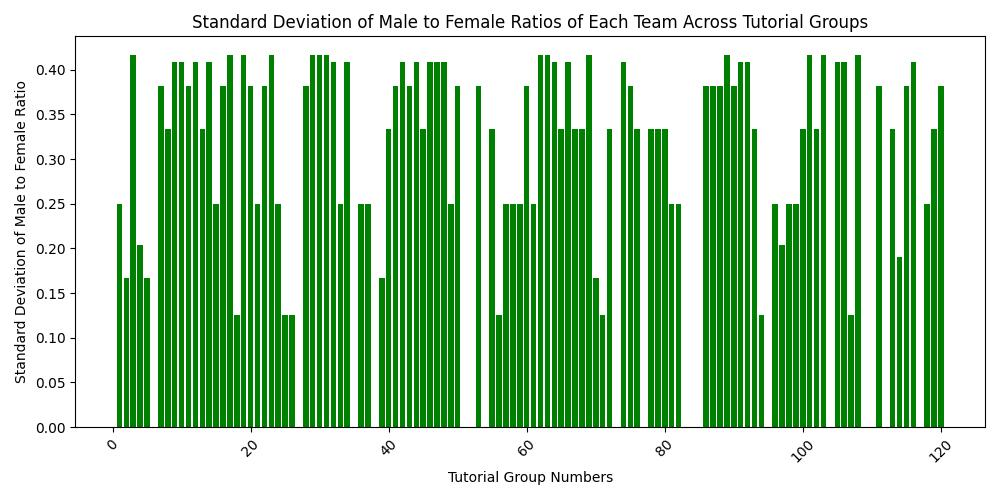

In [31]:
def schools_dominated_teams(headers, tutorial_group_dict):
    dominated_teams = []

    for filename, groups_dict in tutorial_group_dict.items():
        for group_number, students in groups_dict.items():
            school_count = {}

            # Count occurrences of each school
            for student in students:
                school_name = student[headers.index("School")]
                if school_name in school_count:
                    school_count[school_name] += 1
                else:
                    school_count[school_name] = 1

            # Check for schools with more than 2 students
            for school, count in school_count.items():
                if count > 2:
                    dominated_teams.append((filename, group_number, school, count))

    if dominated_teams:
        print("Teams with more than 2 students from the same school:")
        for filename, group_number, school, count in dominated_teams:
            print(f"File: {filename}, Group: {group_number}, School: {school}, Count: {count}")
    else:
        print("No teams with more than 2 students from the same school found.")

Lastly, we checked for teams which might have a majority of students from the same school. We aimed to find the specific school and check if further intervention of needed on out part. However, our groups have no teams that have more than two students of the same school. The function schools_dominated_teams hence returned the output "No teams with more than 2 students from the same school found."

--- 
# Define main functions

In [ ]:
def main():
   root = initialize_root_window()
   file_path = get_file_path()

   process_tutorial_groups(file_path)

   csv_files = get_csv_files()
   tutorials_dict = {}

   for filename in csv_files:
       groups_dict = assign_students_to_groups(filename)
       if groups_dict:
           tutorials_dict[filename] = groups_dict

   headers = None
   if csv_files:
       headers = update_headers(csv_files[0])

   sorted_keys = None
   if headers:
       sorted_keys = write_combined_file(headers, tutorials_dict)

   #EDA for CGPA and Male-Female Ratio
   plot_cgpa_spreads(headers, sorted_keys, tutorials_dict)
   plot_male_female_ratios(headers, sorted_keys, tutorials_dict)

   #Teams with dominating schools
   schools_dominated_teams(headers, tutorials_dict)

if __name__ == "__main__":
   main()

---
# Additional Requirement



In [33]:
def get_team_size():
    while True:
        try:
            team_size = int(input("Enter the number of students per team (between 4 and 10): "))
            if 4 <= team_size <= 10:
                return team_size
            else:
                print("Please enter a number between 4 and 10.")
        except ValueError:
            print("Invalid input. Please enter an integer.")

In [34]:
def distribute_students_by_gender(headers, tutorial_reader, team_size):
    males, females = [], []
    gender_index = headers.index("Gender")

    # Segregate students by gender
    for row in tutorial_reader:
        if row[gender_index] == 'Male':
            males.append(row)
        elif row[gender_index] == 'Female':
            females.append(row)

    # Sort by CGPA
    males.sort(key=lambda x: float(x[headers.index("CGPA")]))
    females.sort(key=lambda x: float(x[headers.index("CGPA")]))

    total_students = len(males) + len(females)
    num_groups = max(1, total_students // team_size)
    groups_dict = {i: [] for i in range(1, num_groups + 1)}

    # Distribute students into groups
    distribute_to_groups(headers, groups_dict, males, reverse=False)
    distribute_to_groups(headers, groups_dict, females, reverse=True)

    return groups_dict

A major change we had to make to our existing code was to have a function that receives the input on the number of people in a group as well as to include the input to our distribute_students_by_gender function.

The get_team_size function asks of the input of the user on the number of students per group and in our distribute_students_by_gender function we took the total number of students and divided it by the input to get the maximum number of groups. From there the range that was originally set to (1,11) which accommodates for 10 groups is set to (1, num_groups + 1) to accommodate for the new number of groups. 

Code still follows same logic as before, but now with a new range.

---
# Evaluation of code
### Pros
1. Great usability such as using tkinter which allows any csv file to be uploaded into our code instead of just records.csv. 
2. We used .index to get the index of the column names instead of just counting it ourselves so that even csv files that have the columns in a different order can use our code as long as they have the correct column name. 
3. Our code assigns students in a strategic manner instead of in random to ensure that our aims are always regardless of whether there are more or less than 50 students and that too with the best distribution.


### Cons
It would not be the best choice for a person who priorities best school distribution over mean CGPA especially when they use the code under the additional requirement. 

The code still ensures there is no majority, however, prioritising CGPA over school distribution. On the other hand if someone prioritises CGPA over school distribution, then we believe over code will be one of the best. 

---
# Additional Requirement Code
Without matplot code

In [35]:
import csv
import os
import tkinter as tk
from tkinter import filedialog


def initialize_root_window():
    try:
        root = tk.Tk()
        root.withdraw()
        return root
    except Exception as e:
        print("Error initializing the Tkinter root window:", e)
        exit()


def get_file_path():
    try:
        file_path = filedialog.askopenfilename()
        if not file_path:
            raise FileNotFoundError("No file selected.")
        return file_path
    except Exception as e:
        print("Error opening the file dialog:", e)
        exit()


def get_team_size():
    while True:
        try:
            team_size = int(input("Enter the number of students per team (between 4 and 10): "))
            if 4 <= team_size <= 10:
                return team_size
            else:
                print("Please enter a number between 4 and 10.")
        except ValueError:
            print("Invalid input. Please enter an integer.")


def process_tutorial_groups(file_path):
    tutorials_dict = {}
    try:
        with open(file_path, 'r') as records:
            records_reader = csv.reader(records)
            headers = next(records_reader)

            for row in records_reader:
                tutorial_group = row[headers.index("Tutorial Group")]
                if tutorial_group not in tutorials_dict:
                    try:
                        tutorial_file = open(f'{tutorial_group}.csv', 'w', newline='')
                        tutorial_writer = csv.writer(tutorial_file)
                        tutorial_writer.writerow(headers)
                        tutorials_dict[tutorial_group] = (tutorial_writer, tutorial_file)
                    except Exception as e:
                        print(f"Error creating file for tutorial group '{tutorial_group}':", e)
                        continue
                try:
                    tutorials_dict[tutorial_group][0].writerow(row)
                except Exception as e:
                    print("Error writing row to tutorial group file:", e)
        return tutorials_dict
    except FileNotFoundError:
        print("File not found or path is incorrect.")
    except csv.Error as e:
        print("CSV reading error:", e)
    except Exception as e:
        print("An error occurred while processing the file:", e)
    finally:
        close_files(tutorials_dict)


def close_files(tutorials_dict):
    for writer, tutorial_file in tutorials_dict.values():
        tutorial_file.close()


def get_csv_files():
    try:
        directory = os.getcwd()
        all_files = os.listdir(directory)
        return [file for file in all_files if file.startswith('G-')]

    except Exception as e:
        print("Error accessing the current directory or listing files:", e)
        exit()


def find_next_student(headers, groups_dict, students, group, loop_count):
    j = 0 if loop_count % 2 == 0 else -1
    step = 1 if loop_count % 2 == 0 else -1
    while any(student[headers.index("School")] == students[j % len(students)][headers.index("School")]
              for student in groups_dict[group]) and abs(j) < len(students):
        j += step
    return j % len(students)


def distribute_to_groups(headers, groups_dict, students, reverse):
    loop_count = 0
    while students:
        group_range = range(len(groups_dict), 0, -1) if reverse else range(1, len(groups_dict) + 1)
        for i in group_range:
            if not students:
                break
            try:
                index = find_next_student(headers, groups_dict, students, i, loop_count)
                student = students[index]
                student.append(f'Group {i}')
                groups_dict[i].append(student)
                students.pop(index)
            except Exception as e:
                print(f"Error assigning students to group {i}:", e)
        loop_count += 1

def distribute_students_by_gender(headers, tutorial_reader, team_size):
    males, females = [], []
    gender_index = headers.index("Gender")

    # Segregate students by gender
    for row in tutorial_reader:
        if row[gender_index] == 'Male':
            males.append(row)
        elif row[gender_index] == 'Female':
            females.append(row)

    # Sort by CGPA
    males.sort(key=lambda x: float(x[headers.index("CGPA")]))
    females.sort(key=lambda x: float(x[headers.index("CGPA")]))

    total_students = len(males) + len(females)
    num_groups = max(1, total_students // team_size)
    groups_dict = {i: [] for i in range(1, num_groups + 1)}



    # Distribute students into groups
    distribute_to_groups(headers, groups_dict, males, reverse=False)
    distribute_to_groups(headers, groups_dict, females, reverse=True)

    return groups_dict


def assign_students_to_groups(filename,team_size):
    try:
        with open(filename, 'r') as tutorial_file:
            tutorial_reader = csv.reader(tutorial_file)
            headers = next(tutorial_reader)

            return distribute_students_by_gender(headers, tutorial_reader, team_size)
    except FileNotFoundError:
        print(f"File '{filename}' not found.")
    except csv.Error as e:
        print(f"CSV reading error in file '{filename}':", e)
    except Exception as e:
        print(f"An error occurred while processing '{filename}':", e)


def update_headers(filename):
    try:
        with open(filename, 'r') as header_file:
            headers = next(header_file).strip().split(",")
            headers.append('Teams Assigned')
            return headers
    except Exception as e:
        print(f"Error reading headers from '{filename}':", e)


def write_combined_file(headers, tutorials_dict):
    try:
        with open('combined_tutorial_groups.csv', 'w', newline='') as csvfile:
            writer = csv.writer(csvfile)
            writer.writerow(headers)

            sorted_keys = sorted(
                tutorials_dict.keys(),
                key=lambda k: int(k.split('-')[1].split('.')[0])
            )

            for filename in sorted_keys:
                groups_dict = tutorials_dict[filename]
                for group, students in groups_dict.items():
                    for student in students:
                        writer.writerow(student)
                    writer.writerow([])  # Adds a blank line between groups
            return sorted_keys
    except Exception as e:
        print("Error writing the combined CSV file:", e)


def calculate_team_averages(headers, groups_dict):
    averages = {}
    for group, students in groups_dict.items():
        total_cgpa = sum(float(student[headers.index("CGPA")]) for student in students)
        average_cgpa = total_cgpa / len(students) if students else 0
        averages[group] = average_cgpa
    return averages


def main():
    root = initialize_root_window()
    file_path = get_file_path()

    process_tutorial_groups(file_path)

    csv_files = get_csv_files()
    tutorials_dict = {}

    team_size = get_team_size()

    for filename in csv_files:
        groups_dict = assign_students_to_groups(filename,team_size)
        if groups_dict:
            tutorials_dict[filename] = groups_dict

    headers = None
    if csv_files:
        headers = update_headers(csv_files[0])

    sorted_keys = None
    if headers:
        sorted_keys = write_combined_file(headers, tutorials_dict)


if __name__ == "__main__":
    main()

![AI Declaration Form.jpg](<attachment:AI Declaration Form.jpg>)
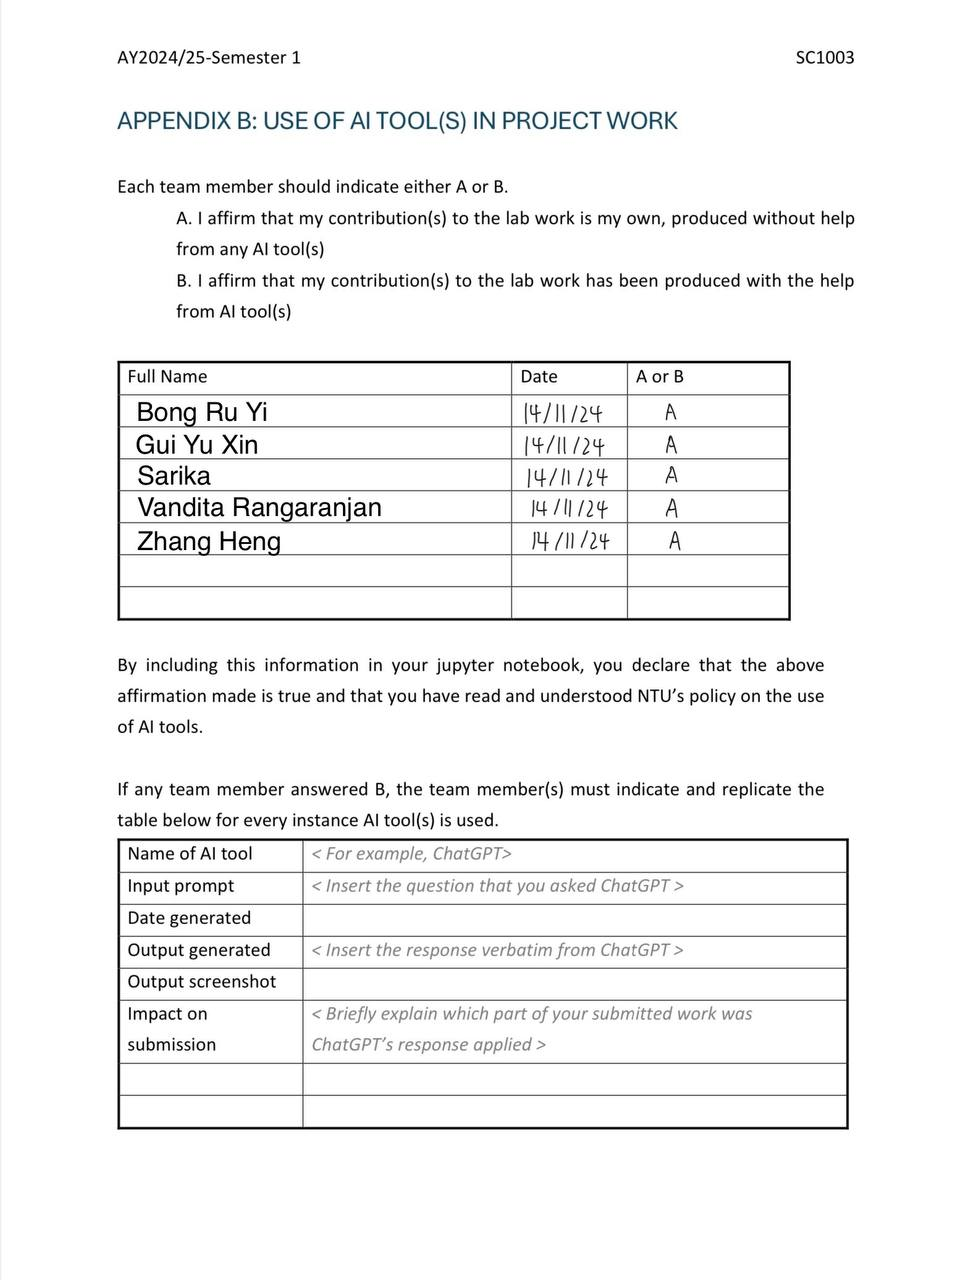